###ANSWER
(for making sure this gets removed)

### INSTRUCTOR CONTENT -- REMOVE THIS IN STUDENT VERSION
#### The goals/notes for this class are:

Students will:
- Clean and prepare data on breast cancer for classification
- Split data into training and test sets
- Build LR models for the full data set and a reduced set
- Evaluate the quality of the fits

Emphasize:
- The supervised learning workflow and how it is different from what they did with linear regression
- How we evaluate the quality of the fits using $R^2$ and the p-values for each feature
- Checking the performance of the model using data the model hasn't been trained on

Lay the ground work for:
- Future measures of model quality for classifiers (ROC, TPR, FPR, etc.)

# In-Class Assignment: Machine Learning; classification with logistic regression
# Day 15
# CMSE 202
<img src="https://i.ibb.co/vv36b1d/supervised-workflow-machine-learning.png" width=700px>


### Agenda for today's class

</p>

1. [Review of Pre-Class assignment](#review)
1. [Training vs Testing](#train-test)
1. [Logistic Regression](#logit)

### <p style="text-align: right;"> &#9989; **Put your name here** </p>
#### <p style="text-align: right;"> &#9989; Put your group member names here</p>

## Imports for the day

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

---
<a id="review"></a>
## 1. Review of Pre-Class assignment

We'll discussion any questions that came up as a class.

----
<a id="train-test"></a>
## 2. Training vs Testing

As you learned in the pre-class, classification is an ML process that maps features of an input data set to class labels. Classification is a **supervised** learning approach where example data is used to train the data. We typically divide the data used to train and evaluate the classifier (the result model) into three sets

- training set
- testing set
- validation set

&#9989; **Do This:** As a group, discuss what these three sets represent. It might help to review these terms on the web. Put your answers down below:

<font size=+3>&#9998;</font> Training set is:

<font size=+3>&#9998;</font> Testing set is:

<font size=+3>&#9998;</font> Validation set is:

#### Defining the features and building the model

If you review the image at the top of the notebook, you might notice that one of the first steps in machine learning is to go from "raw data" into a set of "features" and "labels". Extracting features from our data can sometimes be one of the trickier parts of the process and also one of the most important ones. We have to think carefully about exactly what the "right" features are for training our machine learning algorithm and, when possible, it is advantageous to find ways to reduce the total number of features we are trying to model. Once we define our features, we can build our model.

### 2.1 Working with data

There is a common data set used to work with classification called the breast cancer data set. It is actually available in `sklearn` but rather than working with the dataset that's been cleaned up for us, let's continue to flex your data wrangling skills and look at the original data. You'll need to download two data files:

* `breast-cancer-wisconsin.data`
* `breast-cancer-wisconsin.names`

The data are in ".data" and the ".names" describes that data. 

You can download the files from here:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/breast-cancer-wisconsin.data`

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/breast-cancer-wisconsin.names`

&#9989; **Do This:** Read in the data, label the columns based on the .names file. Look at the dtypes, anything unusual? Why?

<font size=+3>&#9998;</font> What's unusual about dtypes? Why?

In [15]:
# put your code here



In [16]:
### ANSWER ###

df = pd.read_csv("breast-cancer-wisconsin.data")
cols = ["id", "clump", "C-size", "C-shape", "adhesion", "Epi-size", "Bare-Nuc", "chromatin", "Norm-Nuc", "mitoses", "label"]
df.columns = cols
df.dtypes



id            int64
clump         int64
C-size        int64
C-shape       int64
adhesion      int64
Epi-size      int64
Bare-Nuc     object
chromatin     int64
Norm-Nuc      int64
mitoses       int64
label         int64
dtype: object

&#9989; **Do This:** Can you identify what the problem is? If so, can you provide a DataFrame with just the rows that are causing the problem? There are lots of ways to do this so talk it out with your group. If you get stuck, talk with an instructor, so that you can move on to the next part of the assignment without spending too much time here.

In [18]:
# put your code here


In [19]:
### ANSWER ###

# def x_to_num(x):
#     return x.isnumeric()

# n_df = df[df["Bare-Nuc"].apply(lambda x: not x.isnumeric())]

# or

df[(df.values.ravel() == "?").reshape(df.shape).any(axis=1)]

# or

# df[df.eq('?').any(1)]

# or

# df[df.isin(["?"]).any(1)]

# n_df
# df.any(axis=1)

,id,clump,C-size,C-shape,adhesion,Epi-size,Bare-Nuc,chromatin,Norm-Nuc,mitoses,label
22,1057013,8,4,5,1,2,?,7,3,1,4
39,1096800,6,6,6,9,6,?,7,8,1,2
138,1183246,1,1,1,1,1,?,2,1,1,2
144,1184840,1,1,3,1,2,?,2,1,1,2
157,1193683,1,1,2,1,3,?,1,1,1,2
163,1197510,5,1,1,1,2,?,3,1,1,2
234,1241232,3,1,4,1,2,?,3,1,1,2
248,169356,3,1,1,1,2,?,3,1,1,2
274,432809,3,1,3,1,2,?,2,1,1,2
291,563649,8,8,8,1,2,?,6,10,1,4


As you hopefully discussed, we happen to have some rows with missing data values. So, as we've seen previously, we have an imputation problem.

&#9989; **Do This:**  Write code to solve this missing data problem and say what you did.

By the way, there is an argument `na_values` that you can provide to `read_csv` that will mark a list of characters as if they were `np.nan` using `na_values`, which is pretty darn convenient. Using that will help when importing the data for classification. 

In [21]:
# put your code here


In [22]:
### ANSWER ###

df = pd.read_csv("breast-cancer-wisconsin.data", na_values=["?"], names=cols )
# df[df.isna().any(1)]
df = df.fillna(0) # or mean, or just drop the row, or something else
df

,id,clump,C-size,C-shape,adhesion,Epi-size,Bare-Nuc,chromatin,Norm-Nuc,mitoses,label
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


----
## 2.2 : Splitting the dataset for model into training and testing sets
Now that's we've loaded up and cleaned up the data, let's split the data in a training set and final testing set. We want to randomly select 75% of the data for training and 25% of the data for testing.

Also, **you should turn the `class_labels` into 0 (currently 2, for benign) and 1 (currently 4, for malignant) as the classifier we are going to use (Logisitic Regression) predicts valuse between 0 and 1.**

&#9989; **Do This**: You will need to come up with a way to split the data into separate training and testing sets (we will leave the validation set out for now).  Make sure you keep the feature vectors and classes together.  

**BIG HINT**: This is a very common step in machine learning, and there exists a function to do this for you in the `sklearn` library called `train_test_split`. From the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), you find that takes the features and class labels as input and returns
4 outputs:
- 2 feature sets (one for training and one for testing)
- 2 class labels sets (the corresponding one for training and for testing)

Use `train_test_split` to split your data into a training set and a testing set that correspond to 75% and 25% of your data respectively. To ensure that some of the provided code below will work, you should use the variable names `train_vectors`, `test_vectors`, `train_labels`, and `test_labels` to store your results. Check the length of the resulting output to make sure the splits follow what you expected.

**Important Note**: You'll need to break up your dataframe into a set of labels and a set of features before you do the train-test splitting. You also want to make sure you "features" don't include any columns that don't make sense to use as features (i.e. avoid including columns that would not be expected to have any meaningful influence on the labels)

In [25]:
# Put your code here

In [26]:
### ANSWER ###

#Note: if students have an older version of sklearn, they may need to use the following import instead
# Or, they can do 'conda update sklearn' or pip install sklearn --upgrade

#from sklearn.cross_validation import train_test_split

class_labels= df["label"].replace({2:0.0, 4:1.0})
feature_vectors = df.drop(["label"], axis=1)
feature_vectors = feature_vectors.drop(["id"], axis=1)

train_vectors, test_vectors, train_labels, test_labels = train_test_split(feature_vectors, class_labels, test_size=0.25)
print(train_vectors)
print(train_labels)

     clump  C-size  C-shape  adhesion  Epi-size  Bare-Nuc  chromatin  \
423      5       1        3         1         2       1.0          2   
696      5      10       10         3         7       3.0          8   
55      10       6        6         3         4       5.0          3   
148      3       1        1         3         8       1.0          5   
470      3       1        1         1         1       1.0          2   
..     ...     ...      ...       ...       ...       ...        ...   
40       6       6        6         9         6       0.0          7   
31       2       1        1         1         2       1.0          3   
528      6       1        3         2         2       1.0          1   
268     10       8        8         2         3       4.0          8   
29       1       1        3         1         2       1.0          1   

     Norm-Nuc  mitoses  
423         1        1  
696        10        2  
55          6        1  
148         8        1  
470       

&#9989; **Question**: Why do we need to separate our samples into a training and testing set. Why can't we just use all the data for both? Wouldn't that make it work better?

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

----
<a id="logit"></a>
## 3 Logistic Regression

In the pre-class, you watched a video explaining some of the aspects of the logistic regression. The full details on logistic regression require deeper study, but we can gain some insight from looking at the function we are trying to fit to our data. Plot out the curve to the following equation, called the **logistic function**:

$$ f(x) = \frac{e^{x}} {1+e^{x} }  \equiv \frac{1}{1+e^{-x} } $$

&#9989; **Do This**: Create a logistic function and then make the plot of $f(x)$ for $x$ over the range -6 to 6.

In [30]:
# put your code here


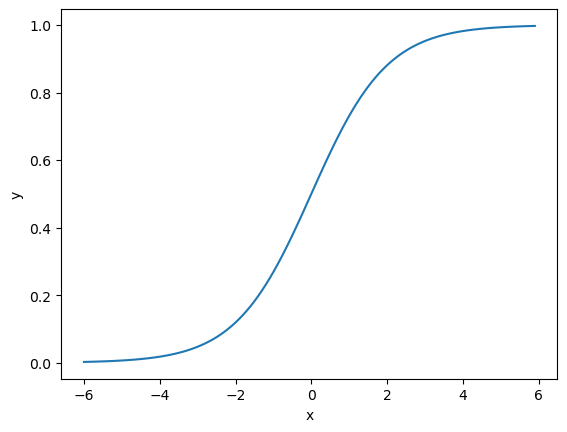

In [31]:
### ANSWER ###
def fn(x):
    return np.exp(x)/(1 + np.exp(x))

# fn = lambda x : np.exp(x)/(1 + np.exp(x))
x = np.arange(-6,6,.1)
y = fn(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y');

What is interesting about that curve is that all values of x are mapped into the range for y of 0.0-1.0. Assuming you have a binary classifier, that is one that only has two class labels, that is the mapping you want: all combination of features map into the two class labels 0, or 1. Moreover, the graph looks a lot like a [cumulative probability distribution](https://en.wikipedia.org/wiki/Cumulative_distribution_function). The probability that a set of features is of class 1 is 1 to the right and 0 to the left. As you watched in the pre-class video, this is the basis for logistic regression.

It's considered a regression because the "x" in our logisitic function is actually going to be a regression equation, such that

$$ fn= b_{0} + b_{1}x_{1} + b_{2}x_{2} + \ldots  $$

for as many terms as we like and the new logistic function

$$ f(x) = \frac{e^{fn(x))}} {1+e^{fn(x)} }  \equiv \frac{1}{1+e^{-fn(x)} } $$

Logisitic classification tries to find the values for the parameters $b_{i}$ that gives maximal performance on training, and hopefully testing. Let's let `statsmodels` do that.

We are going to use all the training data from above and train a logistic regression. It is similar to what we did before with regular regression.

Note, very importantly, the use of `sm.add_constant` on the training vectors. We talked about that when we did OLS in statsmodels. That column of constant is what the $b_{0}$ or intercept will train against. We need that column to get an intercept. (Note that this code requires that you used `train_labels` and `train_vectors` when you did the train-test split earlier)

In [33]:
logit_model = sm.Logit(train_labels, sm.add_constant(train_vectors))
result = logit_model.fit()
print(result.summary() )

Optimization terminated successfully.
         Current function value: 0.078412
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                  524
Model:                          Logit   Df Residuals:                      514
Method:                           MLE   Df Model:                            9
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.8764
Time:                        16:48:26   Log-Likelihood:                -41.088
converged:                       True   LL-Null:                       -332.37
Covariance Type:            nonrobust   LLR p-value:                1.159e-119
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.5844      1.409     -7.513      0.000     -13.346      -7.823
clump          0.5506      0

The "Pseudo R-squ" is the equivalent (mostly) of the R-squared value in Linear regression that we looked for before. It ranges from 0 (poor fit) to 1 (perfect fit). The P values under "P > |z|" are measures of significance. The null hypothesis is that the restricted model (say a constant value for `fn`) performs better and a low p-value suggests that we can reject this hypothesis and prefer the full model over the null model (I.e., LOW $P$-VALUE IS GOOD). This is similar to the F-test for linear regression.

&#9989; **Do This**: Based on the results from above, remove the low-performing columns and then recreate the training and testing sets and run it again. Display the summary.

In [35]:
# put your code here


In [36]:
### ANSWER ###

feature_vectors = df.drop(["label","id","C-size","adhesion","Epi-size", "Norm-Nuc","mitoses"], axis=1)
feature_vectors = sm.add_constant(feature_vectors)
# print(feature_vectors)
train_vectors, test_vectors, train_labels, test_labels = train_test_split(feature_vectors, class_labels, test_size=0.25)
logit_model = sm.Logit(train_labels, train_vectors)
logit_result = logit_model.fit()
print(logit_result.summary() )

Optimization terminated successfully.
         Current function value: 0.099980
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                  524
Model:                          Logit   Df Residuals:                      519
Method:                           MLE   Df Model:                            4
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.8471
Time:                        16:48:26   Log-Likelihood:                -52.390
converged:                       True   LL-Null:                       -342.60
Covariance Type:            nonrobust   LLR p-value:                2.682e-124
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2762      0.908     -9.111      0.000     -10.056      -6.496
clump          0.4389      0.

&#9989; **Question:** How do the fits of the full model and the reduced model compare? What evidence are you using to make compare these two fits?

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

### 3.1 How'd it go?

There are a number of ways that we can check the performance of our model and we will continue new ways throughout the semester. The major difference in the standard statistics approach and supervised learning approaches is that we test our models using the data that we held out: "the testing data." 

That is, we will use our classifier model to make predictions from the test features and we can then compare those predictions to actual test labels. To test accuracy, we can use the output of the `.fit()` method of the model to predict how well the classifier works on the test data (the data it was not trained on). Conveniently that is the `.predict()` method and, again, we use it on the result of the `.fit()`. 

**Note:** The output from `.predict()` is not a 0/1 value as the test labels are, but rather a fraction between 0 and 1 indicating how likely each entry is to be one class or another. We can make the assumption that anything greater than 0.5 would be a 1 class and anything less than 0.5 would be a 0 class. 

&#9989; **Do This**: do the following:
- use the `.predict()` method (look up the documentation as necessary) to create the predicted labels using the test input
- convert the output of the `.predict()` method to the 0/1 class values of the test labels
- print the resulting predicted class values of the test labels

In [40]:
# put your code here


In [41]:
### ANSWER ###

predicted = logit_result.predict(test_vectors)
print(predicted)

nominal = [1.0 if x >0.5 else 0.0 for x in predicted]
# print(nominal)

161    0.016767
640    0.006651
69     0.004550
73     0.994807
446    0.001792
         ...   
123    0.981426
607    0.001792
558    0.004423
537    0.043900
532    0.004550
Length: 175, dtype: float64


One of the first metrics we will use in determining how well a machine learning model is working is the "accuracy score", which compares the predictions our model made for the test labels and the actual test labels. This score is one of many metrics we can use and is included in `sklearn.metrics` as (surprise) `accuracy_score()`. Here's the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) on `accuracy_score`.

&#9989; **Do This**: Using the predicted 0/1 labels you just created:
- Use the `sklearn.metrics` we imported at the top and run the `accuracy_score` on the 0/1 predicted label and the test labels.
- Print your accuracy result

In [ ]:
# put your code here


In [29]:
### ANSWER ###
print(metrics.accuracy_score(nominal, test_labels))

0.9657142857142857


&#9989; **Question:** How well did your model predict the test class labels? Given what you learned in the pre-class assignment about false positives and false negatives, what other questions should we ask about the accuracy of our model?

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell and replace it with your answer to the above question!  (double-click on this text to edit this cell, and hit shift+enter to save the text)

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your names in the first cell).


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University

<!-- 9/16/2024 -->